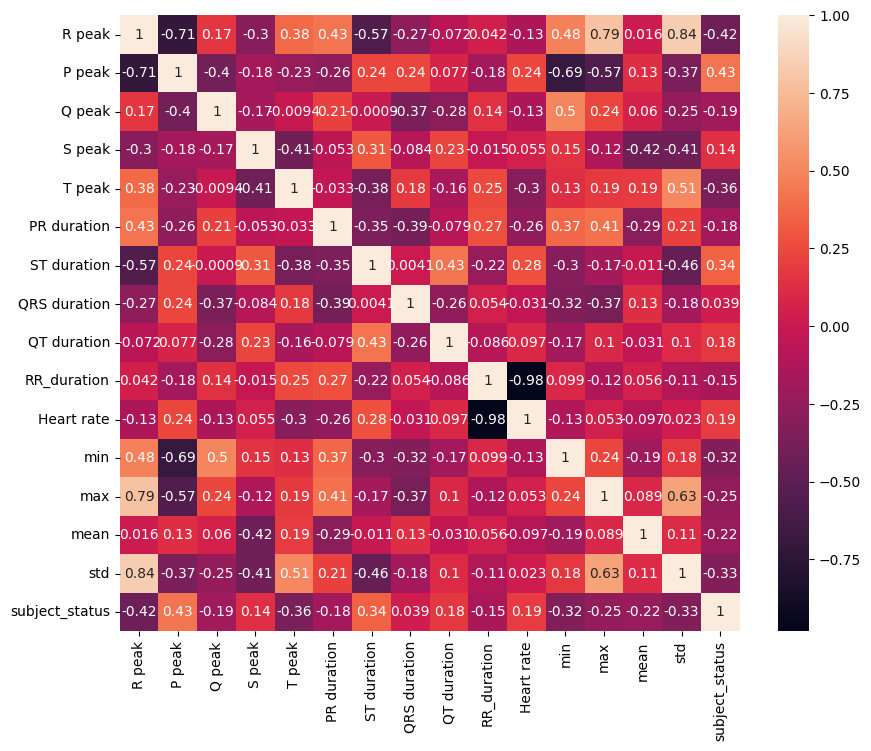

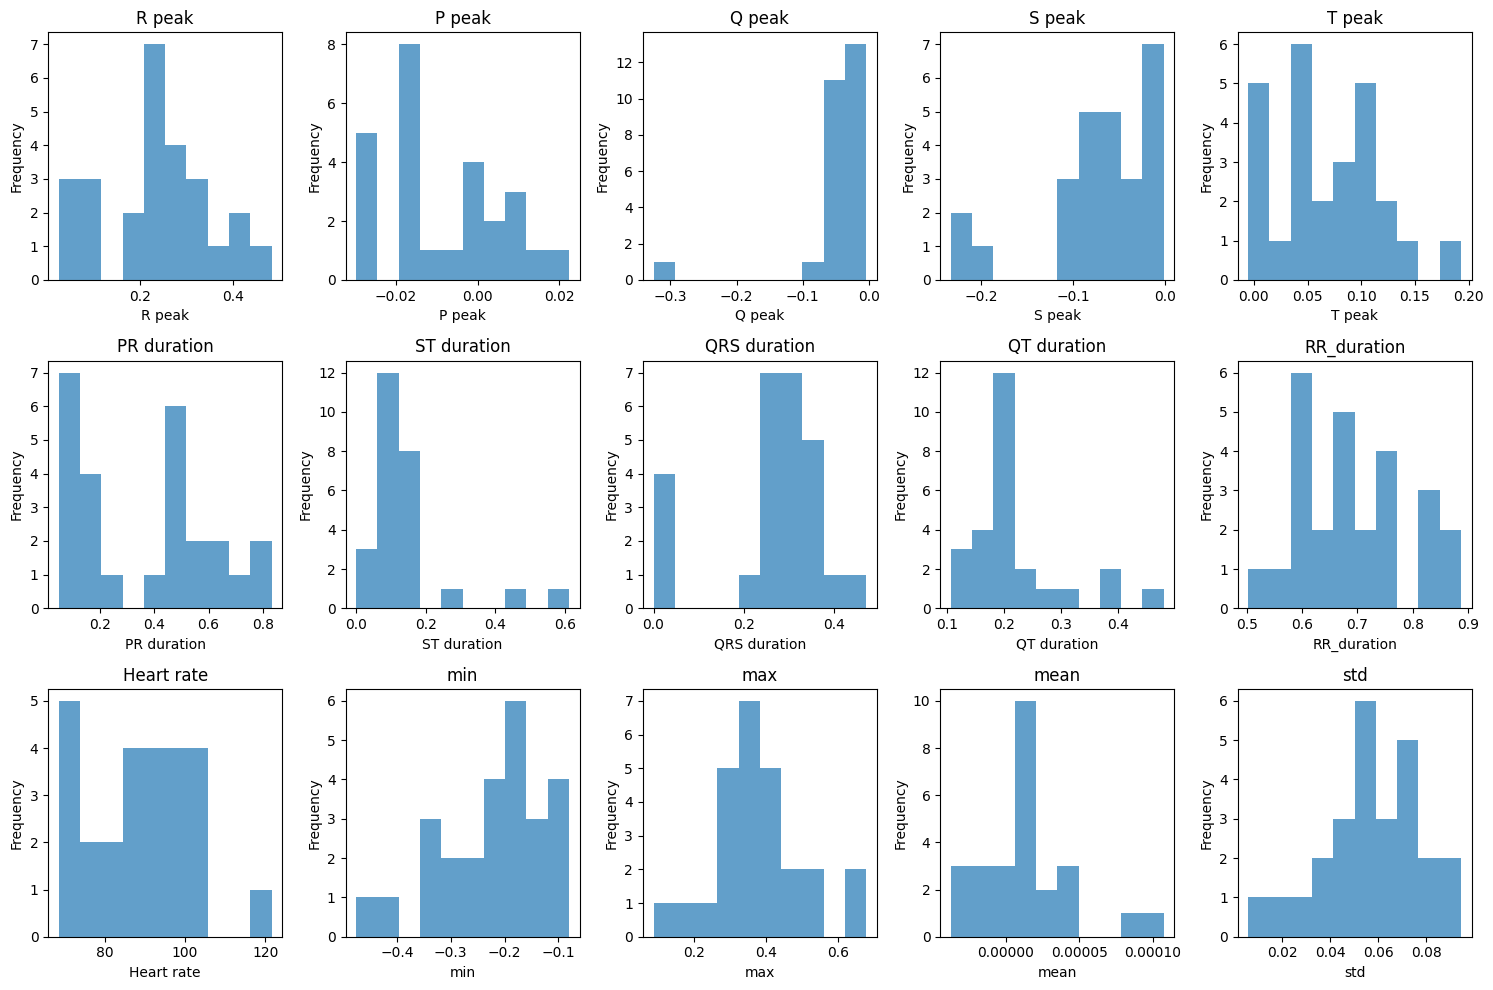

<Figure size 640x480 with 0 Axes>

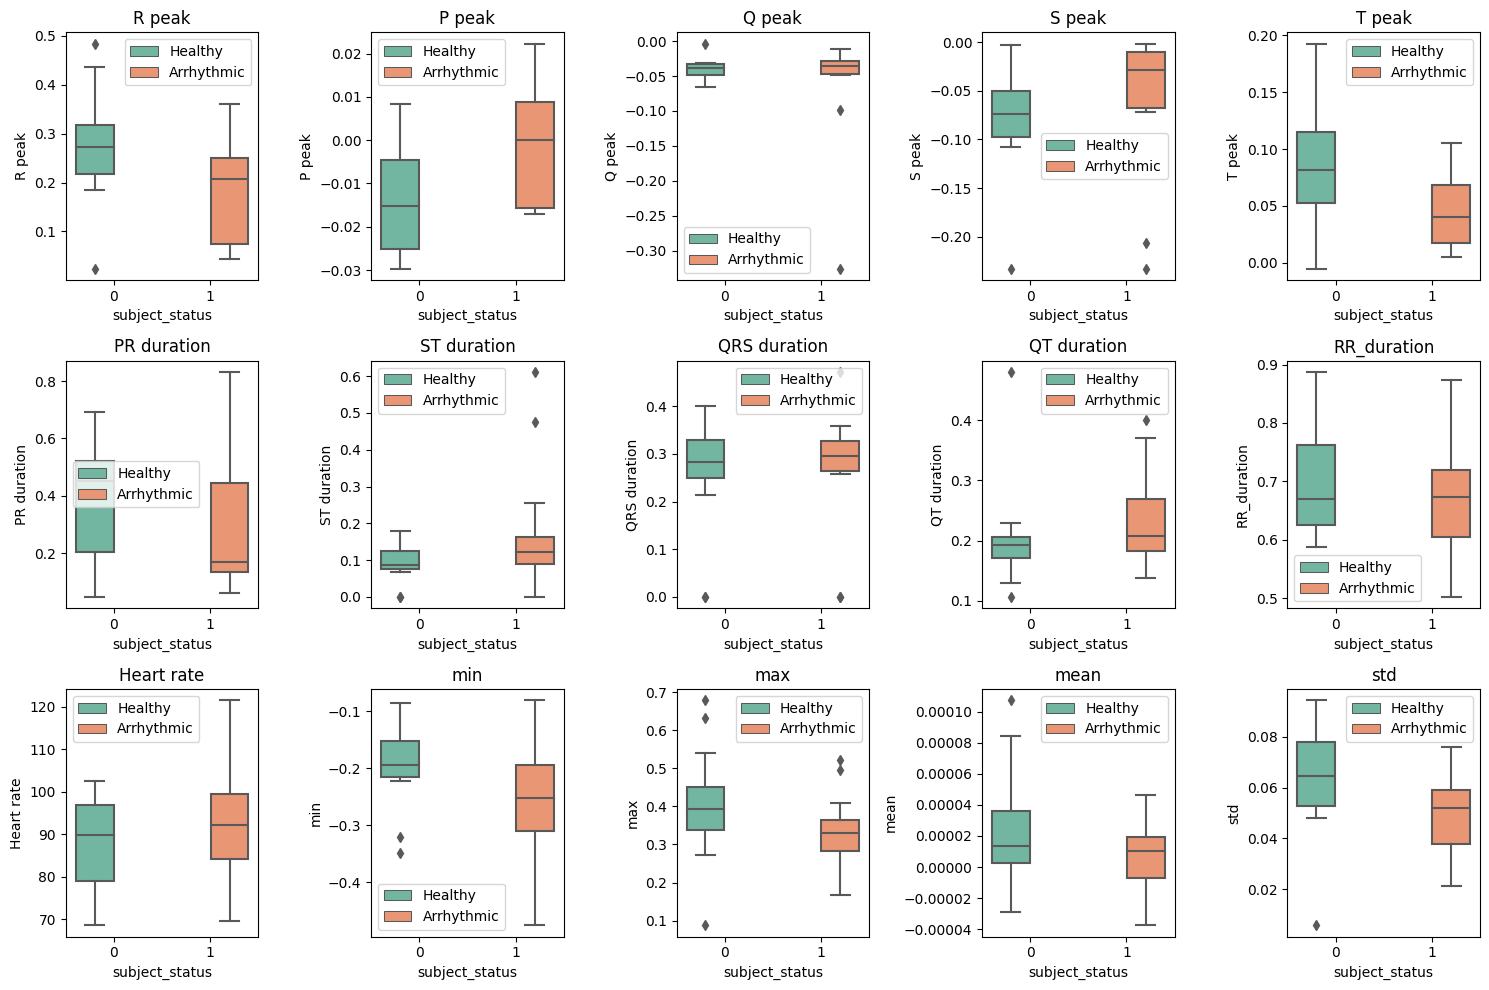

In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

def plot_histogram(feature_matrix, features):
    rows = 3
    cols = 5
    fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(15, 10))
    axes = axes.flatten()
    for i, feature in enumerate(features):
        feature_matrix[feature].plot.hist(ax=axes[i], alpha=0.7)
        axes[i].set_title(feature)
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel("Frequency")
    fig.tight_layout()
    plt.show()

def plot_boxplot(feature_matrix,features):
    plt.figure()
    rows = 3
    cols = 5
    fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(15, 10))
    axes = axes.flatten()
    for i, feature in enumerate(features):
        sn.boxplot(y=feature_matrix[feature], x=feature_matrix['subject_status'], hue=feature_matrix['subject_status'],
                palette='Set2', ax=axes[i])
        axes[i].set_title(feature)
        handles, labels = axes[i].get_legend_handles_labels()
        labels = ['Healthy', 'Arrhythmic']
        axes[i].legend(handles, labels)
    fig.tight_layout()
    plt.show()

features = ['R peak', 'P peak', 'Q peak', 'S peak', 'T peak', 'PR duration','ST duration', 'QRS duration', 'QT duration','RR_duration', 'Heart rate', "min", "max", "mean", "std"]
feature_matrix = pd.read_csv(r"C:\root\code\git\fetal_arrhythmia_detection\feature_matrix.csv")
y_labels_arr = ['ARR_{}'.format(i) for i in range(1, 13)]
y_labels_nr = ['NR_{}'.format(i) for i in range(1, 15)]
y_labels = y_labels_arr + y_labels_nr
feature_matrix.index = y_labels

corr_matrix = feature_matrix.corr()
plt.figure(figsize=(10, 8))
sn.heatmap(corr_matrix, annot=True)
plot_histogram(feature_matrix, features)
plot_boxplot(feature_matrix, features)